# Customer Churn Analysis Project

Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

Importing the important libraries for data reading and cleaning.

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the data using the url path.

In [168]:
df=pd.read_csv('Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset has 7043 rows and 21 columns

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We have only 3 features as numerical rest others are all categorical. Our target feature is also categorical

In [170]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Lets the check all columns

In [171]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [172]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

CustomerID is giving sequence number so no need of this column. 

In [173]:
df.drop(['customerID'],axis=1,inplace=True)

Lets check all the features values

In [174]:
# Get unique and top values for the dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [175]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

Male      3555
Female    3488
Name: gender, dtype: int64


0    5901
1    1142
Name: SeniorCitizen, dtype: int64


No     3641
Yes    3402
Name: Partner, dtype: int64


No     4933
Yes    2110
Name: Dependents, dtype: int64


1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


Yes    6361
No      682
Name: PhoneService, dtype: int64


No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: 

Here Churn is the target featureaving only 2 class yes and no

Let's check for the null values in the dataset.

In [176]:
#Let's check for the null values in the dataset.
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

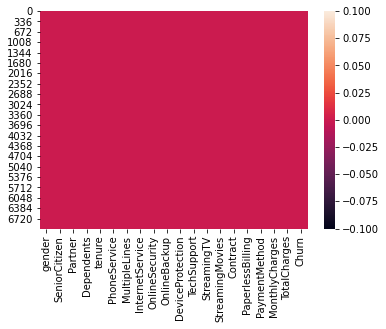

In [177]:
sns.heatmap(df.isnull())  #checking null values

From the above data we can verify that our data has no Null values.

<AxesSubplot:>

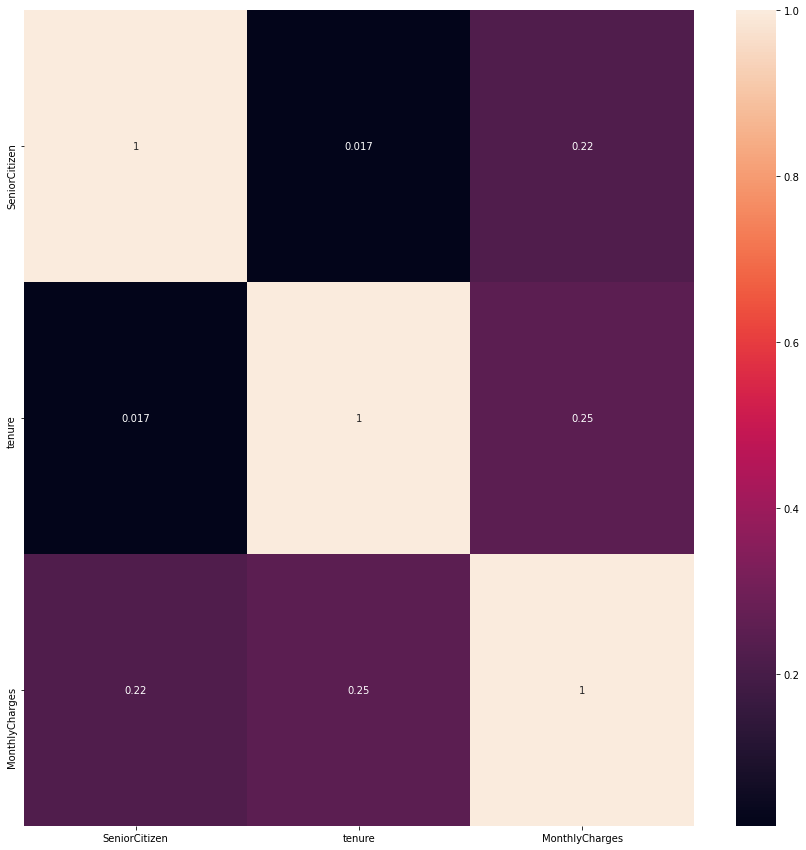

In [178]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

Since most of the features are categorical we have only few data to check corelation.

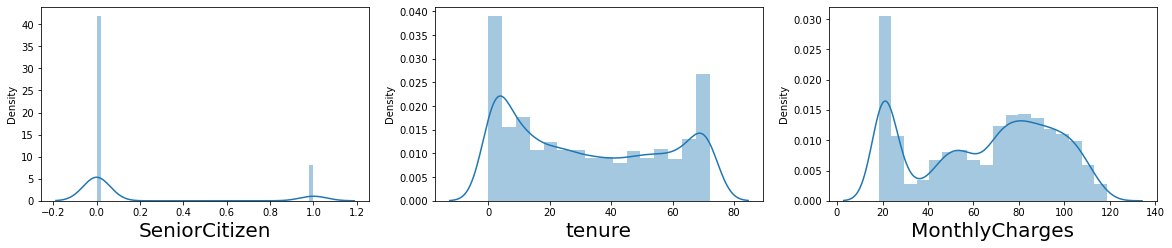

In [179]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.describe().columns:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### Let's check each feature presence in the dataset and its effect on our target variable.

<AxesSubplot:ylabel='Churn'>

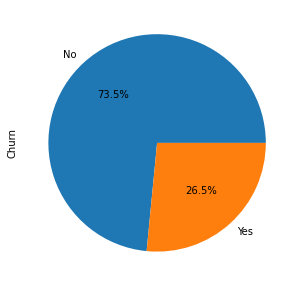

In [180]:
df['Churn'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

In the given dataset 26.5% of the customer leaves the services.

<AxesSubplot:ylabel='gender'>

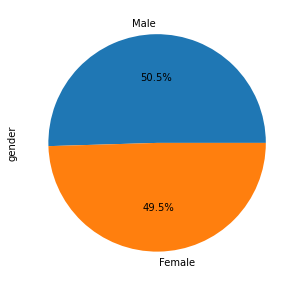

In [181]:
df['gender'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

The data is equally distributed among Male and Female.

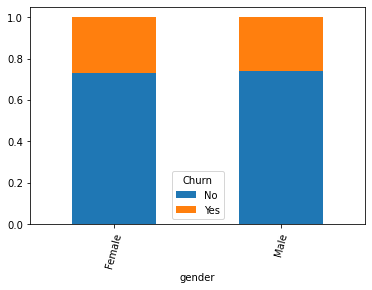

In [182]:
ct = pd.crosstab(df.gender, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Gender plays no role whether the customer will leave the service or not.

<AxesSubplot:ylabel='SeniorCitizen'>

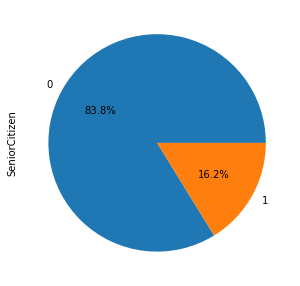

In [183]:
df['SeniorCitizen'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

16.2% of the customer are senior citizens.

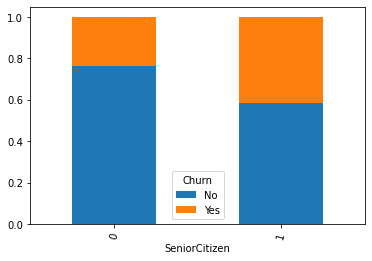

In [184]:
ct = pd.crosstab(df.SeniorCitizen, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Senior citizen are more likely to leave the services.

<AxesSubplot:ylabel='Partner'>

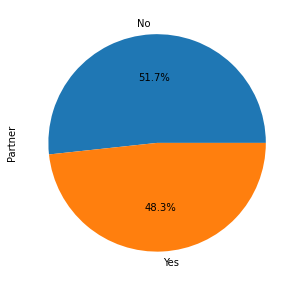

In [185]:
df['Partner'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

48.3% customer have their partners.

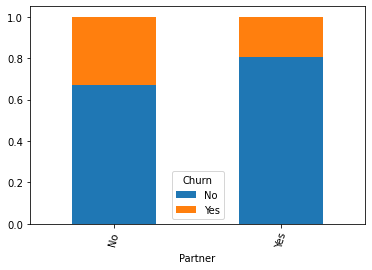

In [186]:
ct = pd.crosstab(df.Partner, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having partner make them less likey to leave the service.

<AxesSubplot:ylabel='Dependents'>

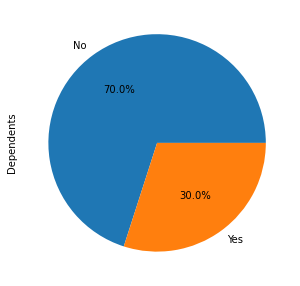

In [187]:
df['Dependents'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

30% of the subscribers have dependents

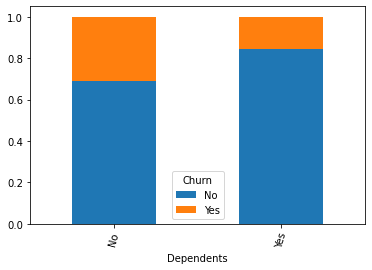

In [188]:
ct = pd.crosstab(df.Dependents, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No dependents can make the subscriber leave the service.

<AxesSubplot:ylabel='PhoneService'>

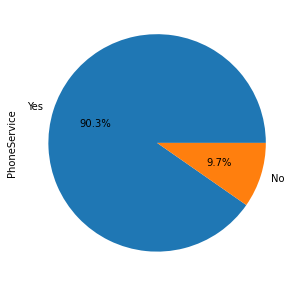

In [189]:
df['PhoneService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

9.7% of the subscriber have no phone service.

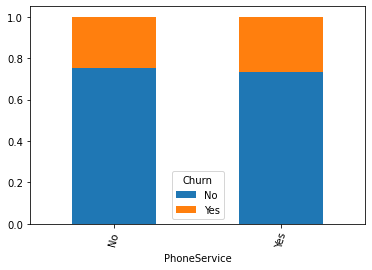

In [190]:
ct = pd.crosstab(df.PhoneService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having phone service do not have any impact on customer leaving the service.

<AxesSubplot:ylabel='InternetService'>

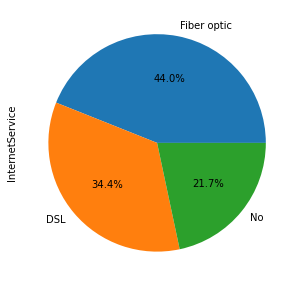

In [191]:
df['InternetService'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

Around 44% of the users use Fibre optic.

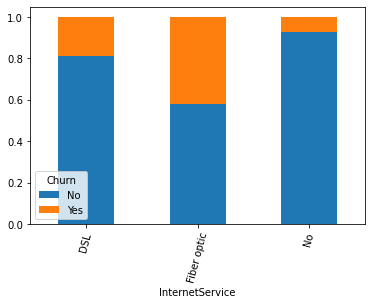

In [192]:
ct = pd.crosstab(df.InternetService, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingTV'>

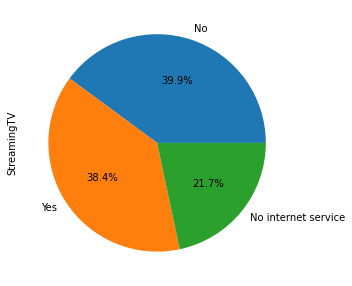

In [193]:
df['StreamingTV'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.9% of the user did not opt for the Streaming Tv service.

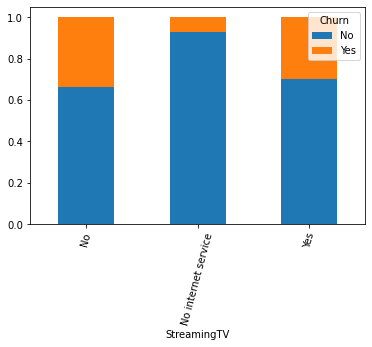

In [194]:
ct = pd.crosstab(df.StreamingTV, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having No internet service can make the user stay with the service.

<AxesSubplot:ylabel='StreamingMovies'>

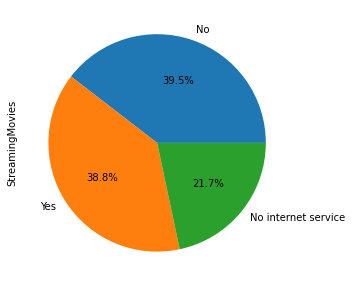

In [195]:
df['StreamingMovies'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

39.5% of the user did not opt for the Streaming Movies service.

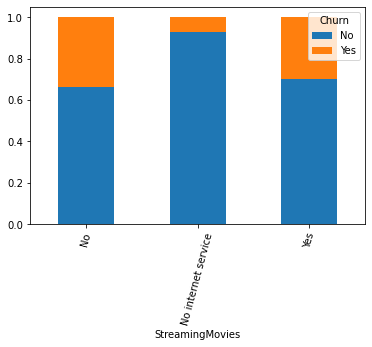

In [196]:
ct = pd.crosstab(df.StreamingMovies, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Same like streaming TV, users with no internet service have less chance of leaving the service.

Is there something wrong with the internet service?

Churn is mrore among the users who use internet services like Fibre Optics and DSL.

The telecom company need to check if the quality of service needs to be improved.

<AxesSubplot:ylabel='Contract'>

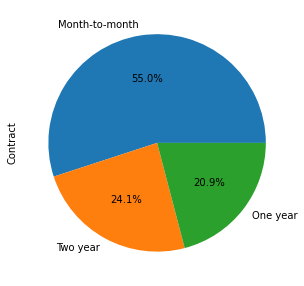

In [197]:
df['Contract'].value_counts().plot.pie(figsize = (5,5), autopct = '%.1f%%')

55 of the users have month to month contract.

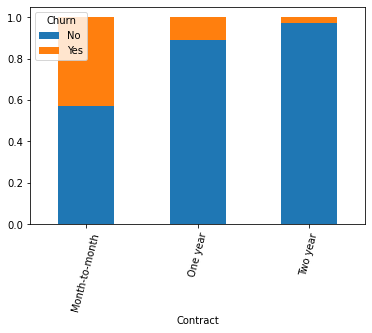

In [198]:
ct = pd.crosstab(df.Contract, df.Churn,normalize='index')
ct.plot.bar(stacked=True)
plt.xticks(rotation=75)
plt.show()

Having a long contract can make the user stays with the services.

Company has to make the long plan more attractive.

Let's check for the outliers

SeniorCitizen        AxesSubplot(0.125,0.749828;0.0945122x0.130172)
tenure            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
MonthlyCharges    AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
dtype: object

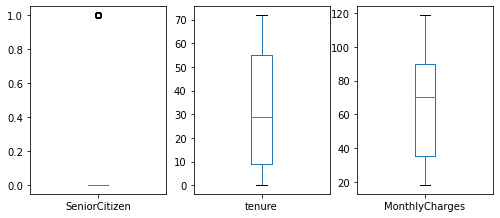

In [199]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

There is no outliers presents. Since senior citizen has only 2 variable,1 is showing as outliers which is not correct.

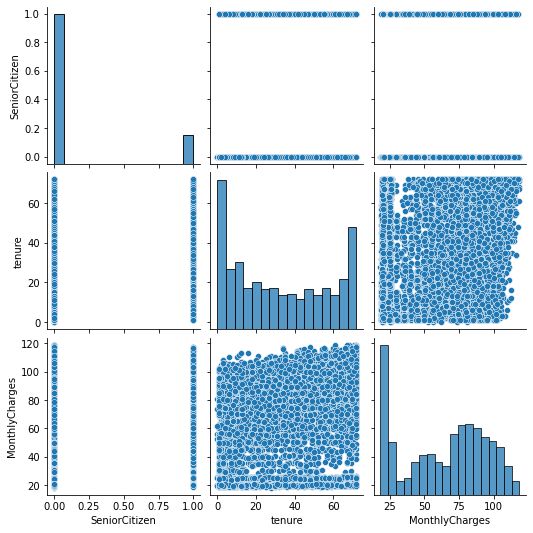

In [200]:
sns.pairplot(df)

Let's check for skewness.

In [201]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

skewness is not present in the dataset.

# Categorial Data : Label Encoding

We will change the categorical data using LabelEncoder

In [202]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes==object:
        df[i]=le.fit_transform(df[i])

In [203]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


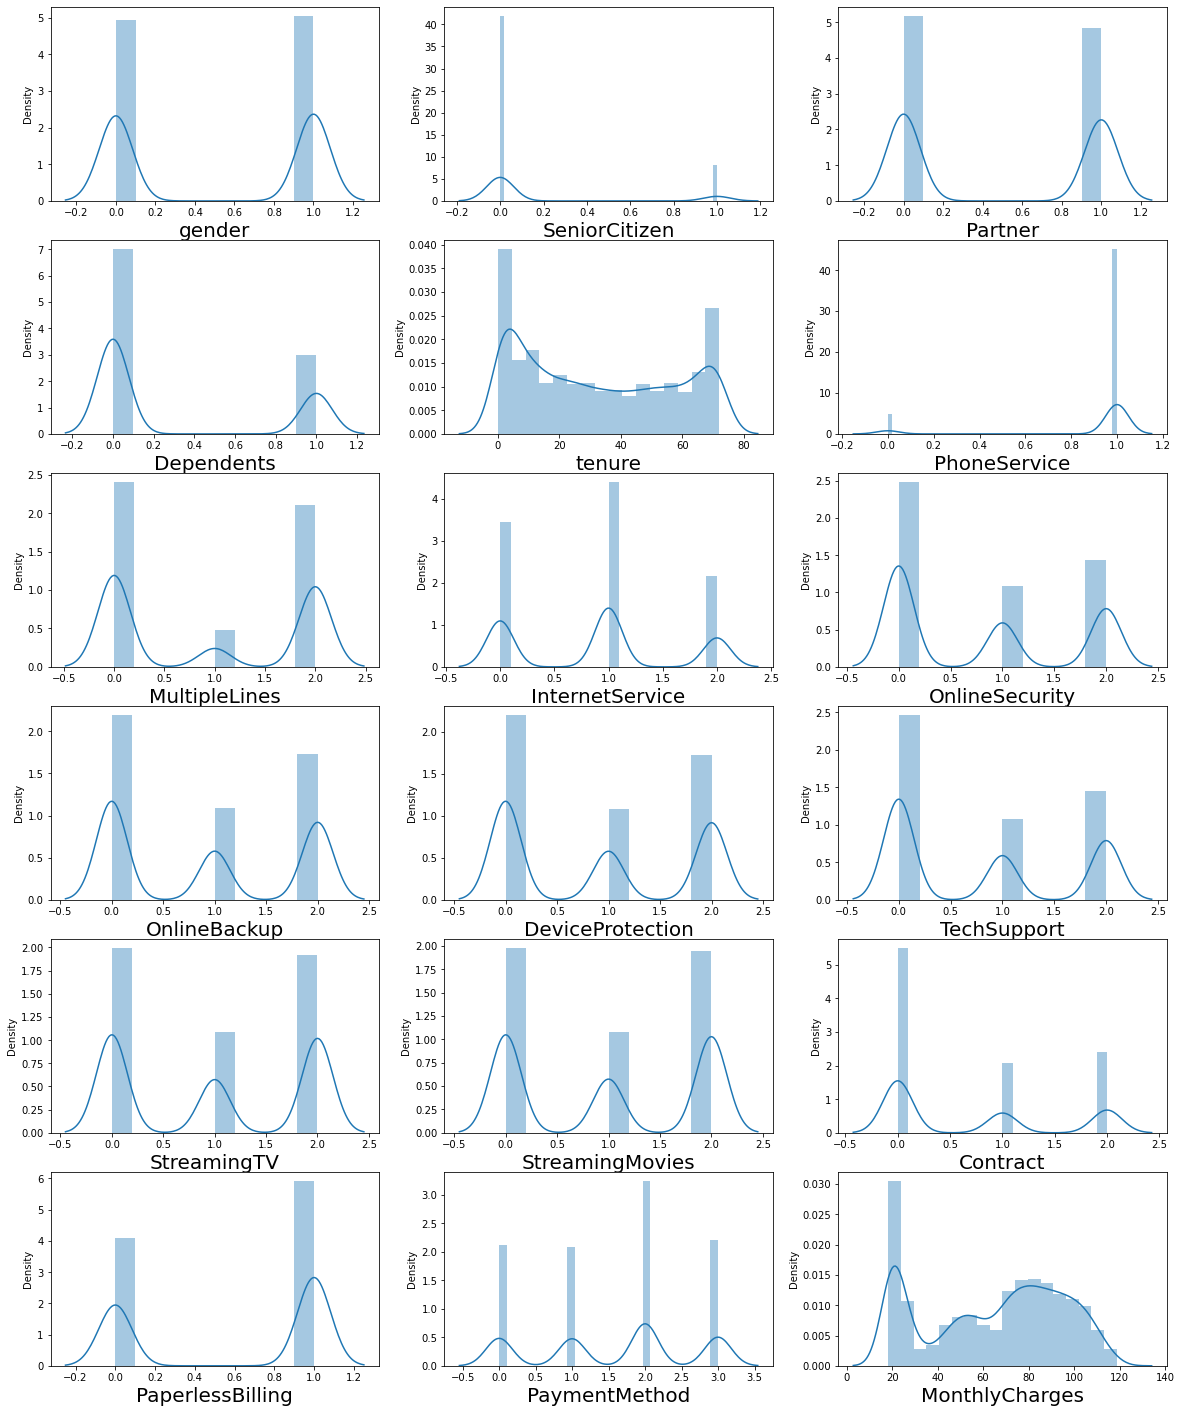

In [204]:
#Univariate Analysis
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df.describe().columns:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

All data is categorical data 

gender                 AxesSubplot(0.125,0.749828;0.0945122x0.130172)
SeniorCitizen       AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Partner             AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Dependents          AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
tenure              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
PhoneService        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
MultipleLines       AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
InternetService        AxesSubplot(0.125,0.593621;0.0945122x0.130172)
OnlineSecurity      AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
OnlineBackup        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
DeviceProtection    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
TechSupport         AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
StreamingTV         AxesSubplot(0.692073,0.593621;0.0945122x0.130172)
StreamingMovies     AxesSubplot(0.805488,0.593621;0.0945122x0.130172)
Contract            

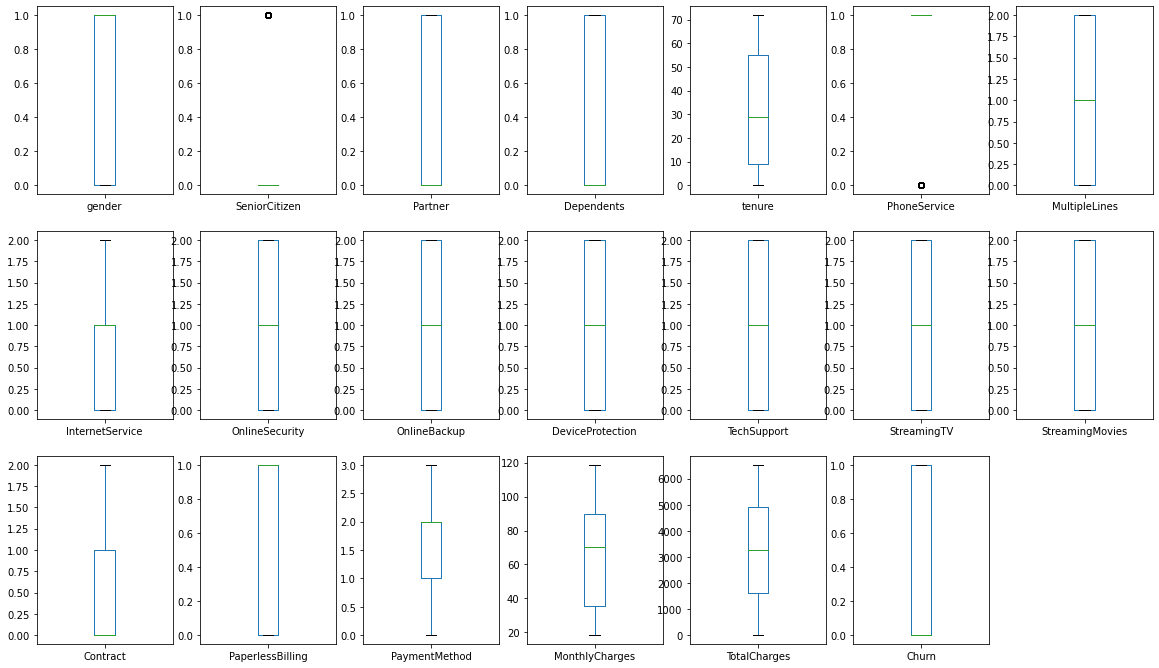

In [205]:
df.plot(kind='box',subplots=True,layout=(5,7),figsize=(20,20))

No outlier present as data is catogorical data

In [206]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

Some skewness is present after label encoding in column SeniorCitizen,Dependents,PhoneService +0.5 to -0.5

Since or data is imbalance we will now balance it using oversampling from SMOTE.

But before that we will split the data into input and target variable.

In [221]:
x=df.drop(['Churn'],axis=1)
y=df['Churn']
y=pd.DataFrame(data=y)

In [222]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [223]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [224]:
x.shape,y.shape

((7043, 19), (7043, 1))

# SMOTE

Import the SMOTE library for over sampling the data.

In [226]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_1,y_1 = sm.fit_resample(x,y)

In [227]:
y_1.value_counts()

Churn
1        5174
0        5174
dtype: int64

We can see that the class is now balance.

In [229]:
print(x_1.shape)
print(y_1.shape)

(10348, 19)
(10348, 1)


We will bring our data to the standard scale using Standard Scaler

In [230]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(x_1)
sc_x=pd.DataFrame(sc_x,columns=x_1.columns)

In [231]:
sc_x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.858724,-0.392604,1.282388,-0.521419,-1.117661,-2.903963,0.107610,-1.230685,-0.757891,1.454388,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,0.456558,-1.353004,-0.401396
1,1.164518,-0.392604,-0.779795,-0.521419,0.262612,0.344357,-0.973504,-1.230685,1.730656,-0.886568,1.451830,-0.766596,-1.027914,-1.035847,0.671900,-1.206492,1.463262,-0.400241,-0.948748
2,1.164518,-0.392604,-0.779795,-0.521419,-1.075834,0.344357,-0.973504,-1.230685,1.730656,1.454388,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,1.463262,-0.509228,-1.638337
3,1.164518,-0.392604,-0.779795,-0.521419,0.722702,-2.903963,0.107610,-1.230685,1.730656,-0.886568,1.451830,1.705431,-1.027914,-1.035847,0.671900,-1.206492,-1.556850,-0.915295,-0.983517
4,-0.858724,-0.392604,-0.779795,-0.521419,-1.075834,0.344357,-0.973504,0.249972,-0.757891,-0.886568,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,0.456558,0.083172,-1.233750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.858724,-0.392604,-0.779795,-0.521419,-1.034008,-2.903963,-0.973504,-1.230685,-0.757891,-0.886568,-0.886282,-0.766596,0.102824,-1.035847,-0.641192,0.828849,-0.550146,0.026361,0.034800
10344,-0.858724,-0.392604,-0.779795,-0.521419,-0.072000,0.344357,0.107610,0.249972,-0.757891,0.283910,-0.886282,-0.766596,1.233562,0.094605,-0.641192,0.828849,0.456558,0.771306,-0.655843
10345,-0.858724,-0.392604,-0.779795,-0.521419,-0.992181,0.344357,0.107610,-1.230685,0.486382,-0.886568,-0.886282,-0.766596,1.233562,1.225057,-0.641192,0.828849,0.456558,1.055108,-0.139573
10346,-0.858724,-0.392604,-0.779795,-0.521419,-1.117661,0.344357,-0.973504,0.249972,-0.757891,-0.886568,0.282774,-0.766596,1.233562,1.225057,-0.641192,-1.206492,0.456558,0.917324,1.661051


In [232]:
y=y_new
x=sc_x
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-0.858724,-0.392604,1.282388,-0.521419,-1.117661,-2.903963,0.107610,-1.230685,-0.757891,1.454388,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,0.456558,-1.353004,-0.401396
1,1.164518,-0.392604,-0.779795,-0.521419,0.262612,0.344357,-0.973504,-1.230685,1.730656,-0.886568,1.451830,-0.766596,-1.027914,-1.035847,0.671900,-1.206492,1.463262,-0.400241,-0.948748
2,1.164518,-0.392604,-0.779795,-0.521419,-1.075834,0.344357,-0.973504,-1.230685,1.730656,1.454388,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,1.463262,-0.509228,-1.638337
3,1.164518,-0.392604,-0.779795,-0.521419,0.722702,-2.903963,0.107610,-1.230685,1.730656,-0.886568,1.451830,1.705431,-1.027914,-1.035847,0.671900,-1.206492,-1.556850,-0.915295,-0.983517
4,-0.858724,-0.392604,-0.779795,-0.521419,-1.075834,0.344357,-0.973504,0.249972,-0.757891,-0.886568,-0.886282,-0.766596,-1.027914,-1.035847,-0.641192,0.828849,0.456558,0.083172,-1.233750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,-0.858724,-0.392604,-0.779795,-0.521419,-1.034008,-2.903963,-0.973504,-1.230685,-0.757891,-0.886568,-0.886282,-0.766596,0.102824,-1.035847,-0.641192,0.828849,-0.550146,0.026361,0.034800
10344,-0.858724,-0.392604,-0.779795,-0.521419,-0.072000,0.344357,0.107610,0.249972,-0.757891,0.283910,-0.886282,-0.766596,1.233562,0.094605,-0.641192,0.828849,0.456558,0.771306,-0.655843
10345,-0.858724,-0.392604,-0.779795,-0.521419,-0.992181,0.344357,0.107610,-1.230685,0.486382,-0.886568,-0.886282,-0.766596,1.233562,1.225057,-0.641192,0.828849,0.456558,1.055108,-0.139573
10346,-0.858724,-0.392604,-0.779795,-0.521419,-1.117661,0.344357,-0.973504,0.249972,-0.757891,-0.886568,0.282774,-0.766596,1.233562,1.225057,-0.641192,-1.206492,0.456558,0.917324,1.661051


### Training and Test Data
Model Fitting and Selection
We will separate our data into a training set and a test set . This is a very standard approach in Machine Learning.
The stratify option ensures that the ratio of edible to poisonous mushrooms in our dataset remains the same in both training and test sets. The random_state parameter is simply a seed for the algorithm to use (if we didn't specify one, it would create different training and test sets every time we run it)

In [233]:
#Importing all the libraries for model fitting, cross validation and ROC AUC curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [234]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8280193236714976  on Random state 92


#### We can see that the best random state is maxRS. We will split the data with this random state

In [235]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [236]:
lg=LogisticRegression()
svc=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
abc=AdaBoostClassifier(n_estimators=100)
et = ExtraTreesClassifier()
xgb = XGBClassifier(eval_metric = 'logloss')


model=[lg,svc,knn,rfc,dtc,gnb,abc,et,xgb]

Test=[]

for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    acc=accuracy_score(y_test,pred)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    Test.append(acc)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8235104669887279
[[1233  337]
 [ 211 1324]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1570
           1       0.80      0.86      0.83      1535

    accuracy                           0.82      3105
   macro avg       0.83      0.82      0.82      3105
weighted avg       0.83      0.82      0.82      3105

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8347826086956521
[[1289  281]
 [ 232 1303]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1570
           1       0.82      0.85      0.84      1535

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105

-----------------------------------------------------------------------------------

##### RFC has perforwed well with test accuracy of 85%

Lets check the overfitting and underfitting of all the model.

### Cross Validation

We will check the Underfitting or Overfitting of the model using Cross Validation

In [237]:
cv=[]
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    cv.append(score.mean())
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.7973597364359548
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.816594774950208
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.788179638229862
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.8394983223709558
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7867350326769916
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7854728298811767
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8206518587009057
-------------------------------------------------------------------------------
Mean Accuracy of ExtraTr

##### RFC is underfitting and KNN is giving least difference with test accuracy of 80% and CV score of 79%

We will check the ROC_AUC score to pick the final model

### ROC_AUC score

AUC Score of LogisticRegression()
0.8239455175418577




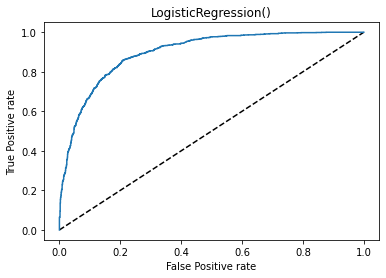



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.8349395215668375




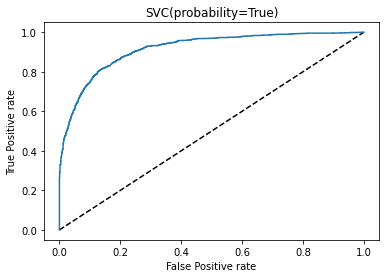



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.8016743085956141




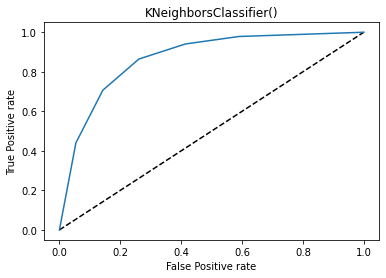



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.85184754870433




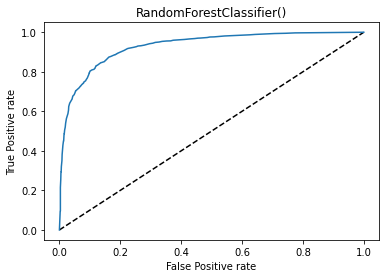



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.789388783999668




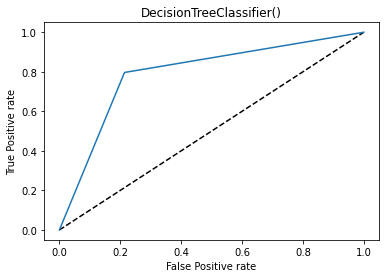



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.8095333928089795




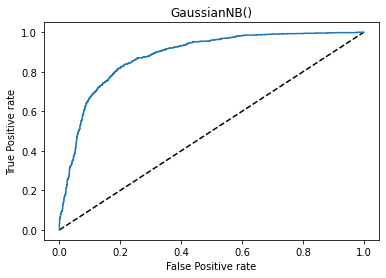



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.8396087055748045




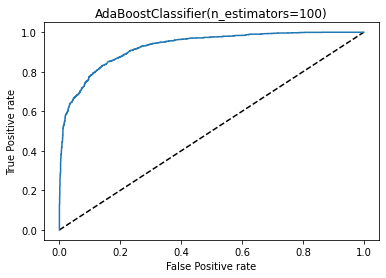



------------------------------------------------------------------------
AUC Score of ExtraTreesClassifier()
0.8404396356770888




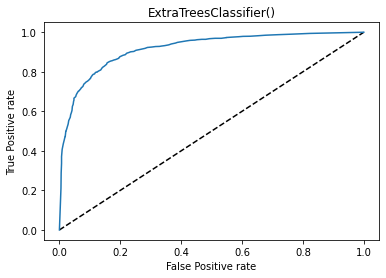



------------------------------------------------------------------------
AUC Score of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)
0.8479895848461586




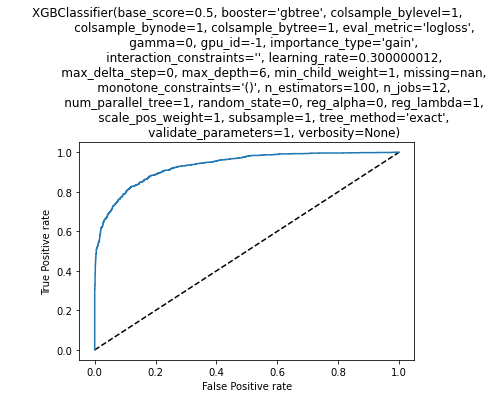



------------------------------------------------------------------------


In [238]:
auc=[]
for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    auc.append(auc_score)
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

#### Lets see all our model performance.

In [239]:
Performance={'Model':['LogisticRegression','SVC','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier','XGBClassifier'],
           'Test Score':Test,'Cross Validation Score':cv,'ROC AUC Score':auc}
Performance=pd.DataFrame(data=Performance)
Performance

,Model,Test Score,Cross Validation Score,ROC AUC Score
0,LogisticRegression,0.823510,0.797360,0.823946
1,SVC,0.834783,0.816595,0.834940
2,KNeighborsClassifier,0.800966,0.788180,0.801674
3,RandomForestClassifier,0.851852,0.839498,0.851848
4,DecisionTreeClassifier,0.789372,0.786735,0.789389
5,GaussianNB,0.809340,0.785473,0.809533
6,AdaBoostClassifier,0.839291,0.820652,0.839609
7,ExtraTreesClassifier,0.840580,0.827130,0.840440
8,XGBClassifier,0.847987,0.830900,0.847990


##### From the above metrics we can observe that:
##### 1. DTC and KNN has performed well with least difference on CV score.
##### 2. RFC has given us the best accuracy of 85% Cv score of 84% and ROC AUC score of 85%
##### 3. Adaboost has also given best accuracy of 84% Cv score of 82% and ROC AUC score of 84%
##### 4. Extratree has also given best accuracy of 84% Cv score of 83% and ROC AUC score of 84%
##### 4. DTC has test accuracy of 79% CV score of 78% and ROC AUC score of 79%
So we will do Hyper tuning for DTC,RFC,Adaboost and Extratree

### HyperTuning of the model

We will import GridSearch to hypertune the model

In [240]:
from sklearn.model_selection import GridSearchCV

##### HyperTuning of RFC

In [241]:
parameters = {'max_depth': [10, 20, 30, 40, None],
                  'max_features': ['auto', 'sqrt'],
                  'min_samples_leaf': [1, 2, 4],
                  'min_samples_split': [2, 5, 10],
                  'n_estimators': [5, 10, 20, 30, 50]}

GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

RFC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 84.73429951690822
Cross Validation Score 83.58264512016588
AUC ROC Score 84.74252577854313


AUC ROC Curve with Final Mod


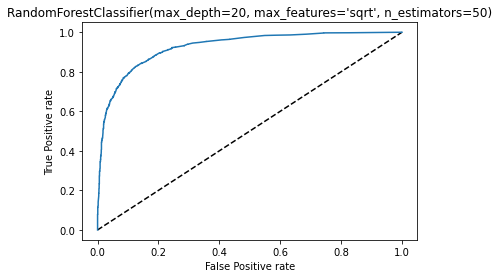

In [244]:
Finalmod=RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=50)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)

cvs=cross_val_score(Finalmod,x,y,cv=5)
y_pred_prob=Finalmod.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
auc_score=roc_auc_score(y_test,Finalmod.predict(x_test))

print('RFC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc*100)
print('Cross Validation Score',cvs.mean()*100)
print('AUC ROC Score',auc_score*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=RandomForestClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod)
plt.show()

##### The model has not improved.

##### HyperTuning of DTC

In [245]:
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}

In [246]:
GCV=GridSearchCV(dtc,params,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 13,
 'random_state': 123}

DTC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 79.25925925925927
Cross Validation Score 78.67322307913224
AUC ROC Score 79.22757733562938


AUC ROC Curve with Final Mod


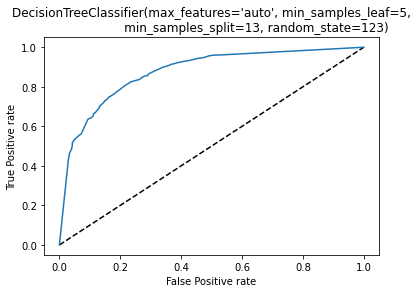

In [247]:
Finalmod2=DecisionTreeClassifier(max_features='auto', min_samples_leaf=5, min_samples_split= 13, random_state=123)
Finalmod2.fit(x_train,y_train)
pred2=Finalmod2.predict(x_test)
acc2=accuracy_score(y_test,pred2)

cvs2=cross_val_score(Finalmod2,x,y,cv=5)
y_pred_prob2=Finalmod2.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob2)
auc_score2=roc_auc_score(y_test,Finalmod2.predict(x_test))

print('DTC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc2*100)
print('Cross Validation Score',cvs2.mean()*100)
print('AUC ROC Score',auc_score2*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=DecisionTreeClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod2)
plt.show()

 DTC has test accuracy incresed by .5 % of 79% CV score of 78% and ROC AUC score of 79%

#### HyperTuning of ExtraTree

In [248]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,4,5,6,7],
         'class_weight':['balanced','balanced_subsample'],
         'n_jobs':[-1,-2,-3,-4],
         }

In [249]:
gcv = GridSearchCV(ExtraTreesClassifier(),params,cv =5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'class_weight': 'balanced',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 100,
 'n_jobs': -4}

DTC Performance after HyperTuning
-----------------------------------------------
Accuracy Score 84.54106280193237
Cross Validation Score 82.91580567054962
AUC ROC Score 84.55797838129422


AUC ROC Curve with Final Mod


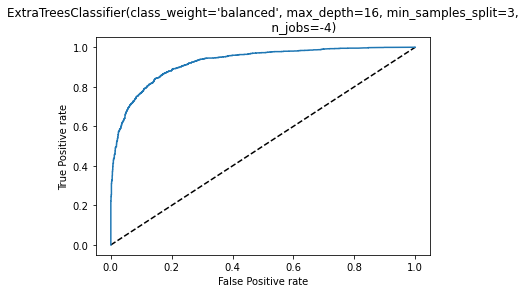

In [250]:
Finalmod3=ExtraTreesClassifier(class_weight= 'balanced',max_depth = 16,min_samples_split = 3, n_estimators = 100, n_jobs =-4)
Finalmod3.fit(x_train,y_train)
pred3=Finalmod3.predict(x_test)
acc3=accuracy_score(y_test,pred3)

cvs3=cross_val_score(Finalmod3,x,y,cv=5)
y_pred_prob3=Finalmod3.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob3)
auc_score3=roc_auc_score(y_test,Finalmod3.predict(x_test))

print('DTC Performance after HyperTuning')
print('-----------------------------------------------')
print('Accuracy Score',acc3*100)
print('Cross Validation Score',cvs3.mean()*100)
print('AUC ROC Score',auc_score3*100)
print('\n')
print('AUC ROC Curve with Final Mod')
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label=ExtraTreesClassifier)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.title(Finalmod3)
plt.show()

 Extratree has test accuracy incresed by .5 % of 84.5% CV score of 82.5% and ROC AUC score of 84.5%
 So we will choose ExtraTree as a best model for our system

# Model Saving

In [253]:
import pickle
filename='CustomerChurn.pkl'
pickle.dump(Finalmod3,open(filename,'wb'))

We have successfully analysed the Customer Churn Analysis dataset,and performed the Data EDA,Data Pre-processing and cleaning,finding the relationships between the different variable columns in the dataset. We also trained our model using different different classifier algorithms, we compare all algorithms accuracy , test acuract cv score and with hyper parameter tuning we conclude that ExtraTrees Classifier giving better performance for finding customer Churn.  